In [ ]:
#import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import style

In [ ]:
# read ufo.csv into a DataFrame called 'ufo'

# print the head and the tail

# examine the default index, data types, and shape of ufo dataframe
ufo=pd.read_csv('ufo.csv')

print(ufo.head())
print("\n")

print(ufo.tail())
print("\n")
print(ufo.shape)

print("\n")
print(ufo.dtypes)

print("\n")
print(ufo.index)


                   City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00


                  City Colors Reported Shape Reported State             Time
33856  West Des Moines             NaN          LIGHT    IA  9/11/2005 21:03
33857           Clovis             NaN          LIGHT    NM  9/11/2005 22:30
33858         Hesperia             NaN       TRIANGLE    CA  9/11/2005 22:30
33859        Dade City             NaN          LIGHT    FL  9/11/2005 23:00
33860         Henniker             NaN            NaN    NH                9


(33861, 5)


City               object
Colors Reported    object
S

In [ ]:
# count the number of missing vaues in each column

col=ufo.columns

total=0

for i in col:
    
    y=pd.isnull(ufo[i]).sum()
    print("Missing values in column ",i," : ",y)
    total=total+y

# count total number of null vlaues in the dataframe
print("Total Count : ",total)
# print those rows which has null values






print(ufo[ufo.isnull().any(axis=1)])



Missing values in column  City  :  35
Missing values in column  Colors Reported  :  28477
Missing values in column  Shape Reported  :  4191
Missing values in column  State  :  0
Missing values in column  Time  :  0
Total Count :  32703
                       City Colors Reported Shape Reported State  \
0                    Ithaca             NaN       TRIANGLE    NY   
1               Willingboro             NaN          OTHER    NJ   
2                   Holyoke             NaN           OVAL    CO   
3                   Abilene             NaN           DISK    KS   
4      New York Worlds Fair             NaN          LIGHT    NY   
...                     ...             ...            ...   ...   
33856       West Des Moines             NaN          LIGHT    IA   
33857                Clovis             NaN          LIGHT    NM   
33858              Hesperia             NaN       TRIANGLE    CA   
33859             Dade City             NaN          LIGHT    FL   
33860           

In [ ]:
# fill null values, 
#if any column is numerical has null value than fill this column with mean of that column

check=[]

for i in col:
    
    check.append( ufo[i].dtype.kind in 'biufc')
    
print(check) 

#...ALL THE COLUMNS HAVE NON NUMERIC VALUES AS THE CHECK LIST IS ALL FALSE...

frequent={}
for i in col:
    
    col_data=ufo[i]
    values={}
    
    for j in col_data:
        
        if pd.isnull(j)==False:

            if j not in values.keys():

                values[j]=1

            else:

                k=values[j]+1

                values[j]=k

    frequent[i]=max(values, key=values.get)



#for i in col:
    
#    ufo[i].fillna(frequent[i], inplace = True)

    
print(ufo.head())
    


[False, False, False, False, False]
                   City Colors Reported Shape Reported State             Time
0                Ithaca             NaN       TRIANGLE    NY   6/1/1930 22:00
1           Willingboro             NaN          OTHER    NJ  6/30/1930 20:00
2               Holyoke             NaN           OVAL    CO  2/15/1931 14:00
3               Abilene             NaN           DISK    KS   6/1/1931 13:00
4  New York Worlds Fair             NaN          LIGHT    NY  4/18/1933 19:00


In [ ]:
# calculate the most frequent value for each of the columns (in a single command)

for i in col:
    
    j=ufo[i].value_counts().idxmax(axis="columns")


    print("Frequen Value in column ",i," : ",j)

# what are the four most frequent colors reported?
print("\n")
colors=list(ufo['Colors Reported'].value_counts().index)
print("Top 4 Colors: ",colors[0:4])
print("\n")
# for reports in VA, what's the most frequent city?

VA={}

city=ufo['City']
state=ufo['State']
CS=pd.DataFrame(city,columns=["City"])
CS['State']=state

for i in CS.value_counts().index: #0 has city 1 has state

    if i[1]=="VA":
    
        if i[0] not in VA.keys():
            
            VA[i[0]]=1
        else:
            
            j=VA[i[0]]
            j=j+1
            VA[i[0]]=j

    
print("City with mose reports in VA ",max(VA, key=VA.get))

# show only the UFO reports from Arlington, VA

V=ufo[ufo['State']=="VA"]

print(V[V['City']=="Arlington"])

# show only the UFO reports in which the City is missing

print("\n")

print(ufo[ufo['City'].isnull()==True])


# how many rows remain if you drop all rows with any missing values?
print("\n")
print("Rows remaining after dropping ",len(ufo)-len(ufo.dropna()))
print("\n")
# replace any spaces in the column names with an underscore
print("\n")
print("Rows remaining after dropping ",len(ufo)-len(ufo.dropna()))
print("\n")
# create a new column called 'Location' that includes both City and State

ufo['Location']=ufo['City']+", "+ufo['State']

# For example, the 'Location' for the first row would be 'Ithaca, NY'

# map existing values to a different set of values
# like in column 'is_male', convert F value to 0 and M to 1 with pandas

# writing generic code to replace spaces with underscores
# In other words, your code should not reference the specific column names

new_col={}

for i in col:
    
    new_col[i]=i.replace(" ","_")

ufo.rename(columns=new_col,inplace=True)
    
print(ufo.columns)




# convert datatype of column 'time'  to the datetime format


Frequen Value in column  City  :  Seattle
Frequen Value in column  Colors Reported  :  RED
Frequen Value in column  Shape Reported  :  LIGHT
Frequen Value in column  State  :  CA
Frequen Value in column  Time  :  11/16/1999 19:00


Top 4 Colors:  ['RED', 'ORANGE', 'GREEN', 'BLUE']


City with mose reports in VA  Virginia Beach
            City Colors Reported Shape Reported State              Time
202    Arlington           GREEN           OVAL    VA   7/13/1952 21:00
6300   Arlington             NaN        CHEVRON    VA    5/5/1990 21:40
10278  Arlington             NaN           DISK    VA   5/27/1997 15:30
14527  Arlington             NaN          OTHER    VA   9/10/1999 21:41
17984  Arlington             RED           DISK    VA  11/19/2000 22:00
21201  Arlington           GREEN       FIREBALL    VA    1/7/2002 17:45
22633  Arlington             NaN          LIGHT    VA    7/26/2002 1:15
22780  Arlington             NaN          LIGHT    VA    8/7/2002 21:00
25066  Arlington       

In [ ]:
#importing file
users = pd.read_table('u.user', sep='|', index_col='user_id')


Describe and show the dataframe

In [ ]:
# describe information of all columns
col=users.columns


for i in col:

    print(users[i].describe())
#print(users.describe())

users['male'] = users['gender'].map({'F':0, 'M':1})

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64
count     943
unique      2
top         M
freq      670
Name: gender, dtype: object
count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object
count       943
unique      795
top       55414
freq          9
Name: zip_code, dtype: object


In [ ]:
# describe information of all numeric columns only

for i in col:

    if users[i].dtype==np.dtype(int):
        
        print(users[i].describe())

count    943.000000
mean      34.051962
std       12.192740
min        7.000000
25%       25.000000
50%       31.000000
75%       43.000000
max       73.000000
Name: age, dtype: float64


In [ ]:
# describe information of all object columns only

for i in col:

    if users[i].dtype==np.dtype(object):
        
        print(users[i].describe())

count     943
unique      2
top         M
freq      670
Name: gender, dtype: object
count         943
unique         21
top       student
freq          196
Name: occupation, dtype: object
count       943
unique      795
top       55414
freq          9
Name: zip_code, dtype: object


In [ ]:

# show first 10 rows of users dataframe

users.head(10)


,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
6,42,M,executive,98101
7,57,M,administrator,91344
8,36,M,administrator,05201
9,29,M,student,01002


detecting duplicate rows

In [ ]:
# check wheather a row is identical to a previous row

List1=np.where((users['age'] == users['age'].shift())&(users['gender'] == users['gender'].shift())&(users['occupation'] == users['occupation'].shift())&(users['zip_code'] == users['zip_code'].shift()),True,False)

List2=users.duplicated()
print(List1)
print("\n")
print(List2)

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [ ]:

# count all duplicate rows in the dataframe
print("\n")
count=0

for i in users.duplicated():

    if i ==True:
        
        count=count+1
    

print("Duplicate Rows Count ",count)
print("\n")
# show only duplicate rows in the dataframe
print(users[users.duplicated()])
print("\n")
# drop all duplicate rows in the dataframe

users.drop_duplicates()

print("\n")
# check a single specific column for duplicates occur or not

col_list=list(col)

col_check = users[users.duplicated(col_list, keep=False)]
print(col_check)


# check specify more than one column for finding duplicates

print("\n")

col_name={}

for i in range(0,len(col_list)):


    col1= users[col_list[i]]


    for j in range(j + 1, len(col_list)):

        col2= users[col_list[j]]

        if col1.equals(col2):
            co_name[i]=j
                  
print("Duplicate Columns : ", col_name)




Duplicate Rows Count  7


         age gender occupation zip_code
user_id                                
496       21      F    student    55414
572       51      M   educator    20003
621       17      M    student    60402
684       28      M    student    55414
733       44      F      other    60630
805       27      F      other    20009
890       32      M    student    97301




         age gender occupation zip_code
user_id                                
67        17      M    student    60402
85        51      M   educator    20003
198       21      F    student    55414
350       32      M    student    97301
428       28      M    student    55414
437       27      F      other    20009
460       44      F      other    60630
496       21      F    student    55414
572       51      M   educator    20003
621       17      M    student    60402
684       28      M    student    55414
733       44      F      other    60630
805       27      F      other    20009
890     

In [ ]:
# display the 3 most frequent occupations in 'users'

O=list(users['occupation'].value_counts().index)

print(O[0:4])

# change the data type of a column name age from int to float
#print(users['age'].dtype)
users = users.astype({"age":"float"})
print(users['age'].dtype)
print("\n")
# for each occupation, calculate the minimum and maximum ages
print("Minimum Ages")
print(users.groupby(['occupation'])['age'].min())

print("\n")
print("Maximum Ages")
print(users.groupby(['occupation'])['age'].max())



['student', 'other', 'educator', 'administrator']
float64


Minimum Ages
occupation
administrator    21.0
artist           19.0
doctor           28.0
educator         23.0
engineer         22.0
entertainment    15.0
executive        22.0
healthcare       22.0
homemaker        20.0
lawyer           21.0
librarian        23.0
marketing        24.0
none             11.0
other            13.0
programmer       20.0
retired          51.0
salesman         18.0
scientist        23.0
student           7.0
technician       21.0
writer           18.0
Name: age, dtype: float64


Maximum Ages
occupation
administrator    70.0
artist           48.0
doctor           64.0
educator         63.0
engineer         70.0
entertainment    50.0
executive        69.0
healthcare       62.0
homemaker        50.0
lawyer           53.0
librarian        69.0
marketing        55.0
none             55.0
other            64.0
programmer       63.0
retired          73.0
salesman         66.0
scientist        55.0
studen

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
doctor             7
homemaker          7
Name: occupation, dtype: int64


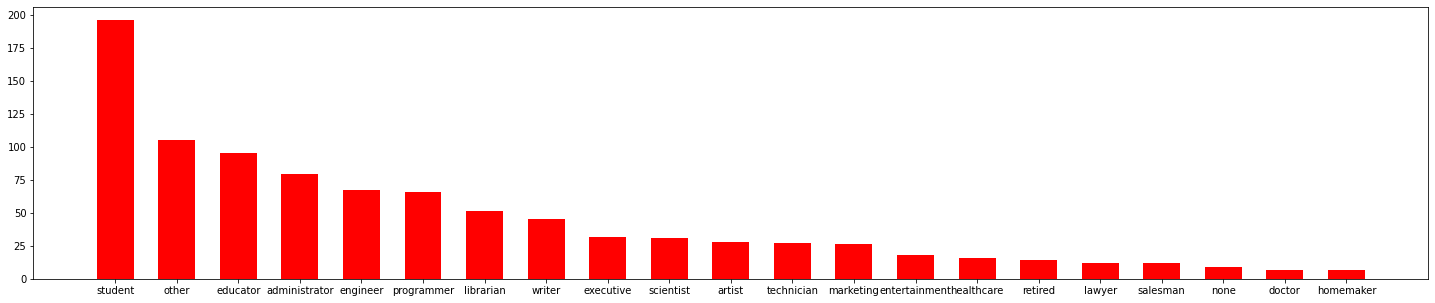

In [ ]:
# for each occupation in 'users', count the number of occurrences
print(users['occupation'].value_counts())
# plot barchar of upper out w.r.t each occupation 

fig = plt.figure(figsize = (25, 5))
l1=list(users['occupation'].value_counts().index)
l2=list(users['occupation'].value_counts().values)
plt.bar(l1, l2, color ='red',width = 0.6)
plt.show()

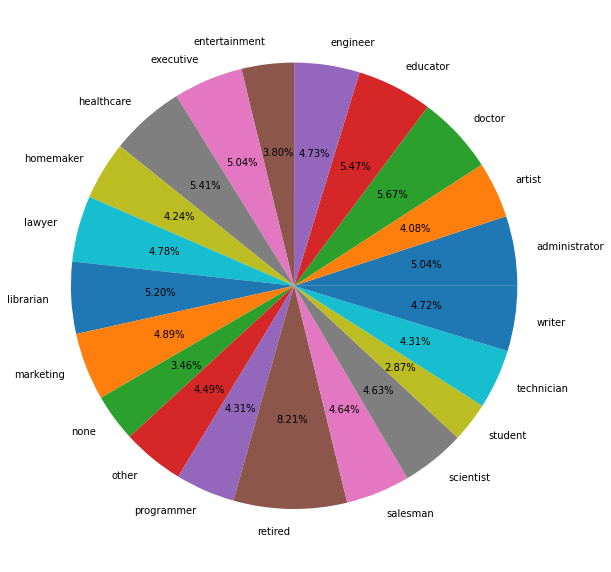

In [ ]:
# for each occupation, calculate the mean age
Mean=users.groupby(['occupation'])['age'].mean()
# plot pie chart of the upper output
fig = plt.figure(figsize =(10, 12))
plt.pie(Mean.values,labels=Mean.index , autopct='%1.2f%%')
  

plt.show()


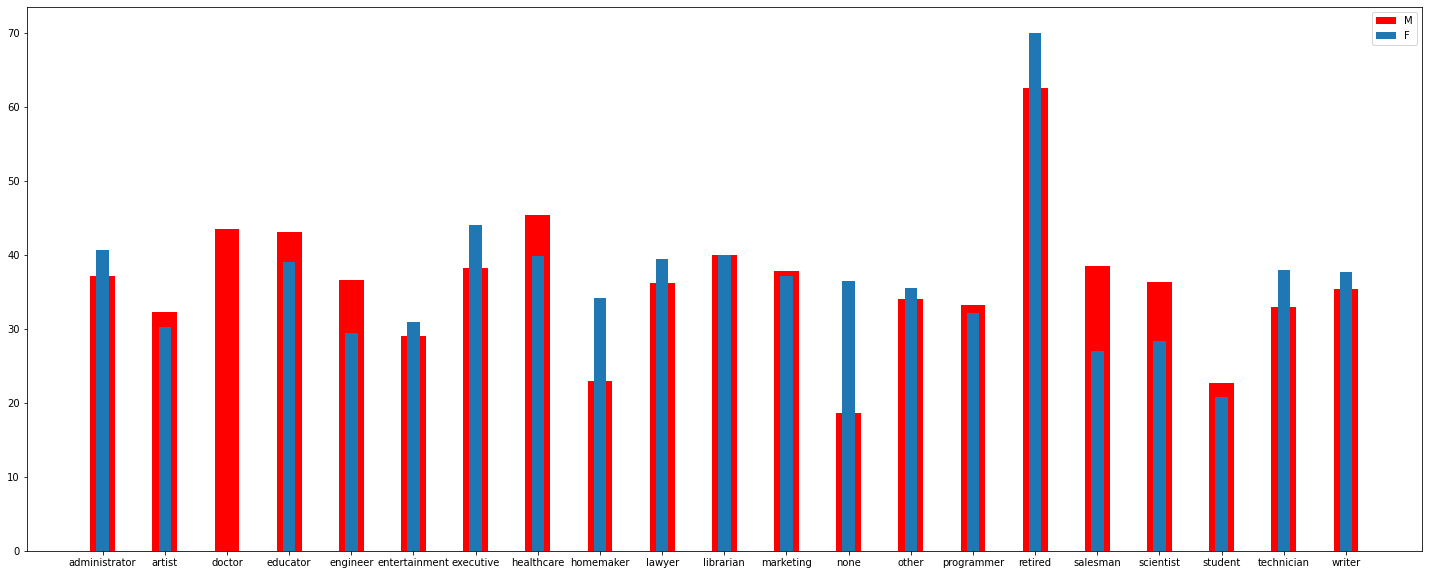

In [ ]:
# for each combination of occupation and gender, calculate the mean age

F=users[users['gender']=="F"]

F=F.groupby(['occupation'])['age'].mean()


M=users[users['gender']=="M"]

M=M.groupby(['occupation'])['age'].mean()


X_axis=len(M.index)

fig = plt.figure(figsize = (25, 10))

#plt.bar(np.arange(len(M.index))+0.2, M.values,0.4, label = 'M',color='red',position=1)

plt.bar(M.index, M.values,0.4, label = 'M',color='red')

X_axis=len(F.index)
#plt.bar(np.arange(len(F.index))-0.2, F.values,0.4, label = 'F',position=1)
plt.bar(F.index, F.values,0.2, label = 'F')

#plt.bar(X_axis + 0.2, F.values, 0.4, label = 'F')
#plt.xticks(X_axis, X)
plt.legend()
plt.show()
# plot barchar of upper out w.r.t each occupation and gender 
#fig = plt.figure(figsize = (25, 5))
#plt.bar(x='x',y='y',data=res,hue='gender')
#plt.show()
#fig = plt.figure(figsize = (25, 5))
#plt.bar(M.index,M.values, color ='red',width = 0.6)
#plt.show()

In [ ]:
# sort 'users' by 'occupation' and then by 'age' (in a single command
users.sort_values(by=['occupation','age'],inplace=True)

print(users)




          age gender     occupation zip_code
user_id                                     
118      21.0      M  administrator    90210
317      22.0      M  administrator    13210
282      22.0      M  administrator    20057
180      22.0      F  administrator    60202
509      23.0      M  administrator    10011
...       ...    ...            ...      ...
548      51.0      M         writer    95468
370      52.0      M         writer    08534
392      52.0      M         writer    59801
558      56.0      F         writer    63132
464      60.0      M         writer    94583

[943 rows x 4 columns]


In [ ]:
# read movie.csv into a DataFrame called 'movie'

movie=pd.read_csv('Movie.csv')

# describe the dataframe

print(movie.describe())
print("\n")

#rename the column Runtime (Minutes) with Runtime_Minutes, and Revenue (Millions) with Revenue_Millions 

movie.rename(columns={'Runtime (Minutes)':'Runtime_Minutes','Revenue (Millions)':'Revenue_(Millions)'},inplace=True)

print(movie.columns)

              Rank         Year  Runtime (Minutes)       Rating         Votes  \
count  1000.000000  1000.000000        1000.000000  1000.000000  1.000000e+03   
mean    500.500000  2012.783000         113.172000     6.723200  1.698083e+05   
std     288.819436     3.205962          18.810908     0.945429  1.887626e+05   
min       1.000000  2006.000000          66.000000     1.900000  6.100000e+01   
25%     250.750000  2010.000000         100.000000     6.200000  3.630900e+04   
50%     500.500000  2014.000000         111.000000     6.800000  1.107990e+05   
75%     750.250000  2016.000000         123.000000     7.400000  2.399098e+05   
max    1000.000000  2016.000000         191.000000     9.000000  1.791916e+06   

       Revenue (Millions)   Metascore  
count          872.000000  936.000000  
mean            82.956376   58.985043  
std            103.253540   17.194757  
min              0.000000   11.000000  
25%             13.270000   47.000000  
50%             47.985000   59

In [ ]:
# show if any column has null value
col=movie.columns

for i in col:
    
    print(movie[i].isnull().any())


# count total number of null vlaues in the dataframe

print("Total Null Values: ",movie.isnull().sum().sum())
    
# print those rows which has null values


print(movie[movie.isnull().any(axis=1)])

False
False
False
False
False
False
False
False
False
False
True
True
Total Null Values:  192
     Rank               Title                     Genre  \
532   533             Deja Vu    Action,Sci-Fi,Thriller   
965   966       Inland Empire    Drama,Mystery,Thriller   
445   446         Silent Hill  Adventure,Horror,Mystery   
828   829          Grindhouse    Action,Horror,Thriller   
917   918  The Girl Next Door        Crime,Drama,Horror   
..    ...                 ...                       ...   
964   965             Custody                     Drama   
932   933          The Ticket                     Drama   
933   934              Detour                  Thriller   
70     71         The Promise             Drama,History   
890   891          The Intent               Crime,Drama   

                                           Description           Director  \
532  After a ferry is bombed in New Orleans, an A.T...         Tony Scott   
965  As an actress starts to adopt the pers

In [ ]:
# fill null values, 
#if column is numerical than fill with means (if there is no numerical missing value in 
#data frame then don't code in this)

for i in col:
    
    print(i," ",movie[i].dtype)
print("\n")

numeric_col=movie.select_dtypes(include=['int64','float64']).columns
numeric_mean={}
Non_numeric={}

for i in numeric_col:
    
    numeric_mean[i]=movie[i].mean()

for i in col:
    
    if i not in numeric_col:
        l=movie[i].value_counts().index
        Non_numeric[i]=l[0]

for i in col:

    if movie[i].isnull().sum()>0:
        
        if i in numeric_col:
            
            movie[i].fillna(numeric_mean[i], inplace = True)
        else:
            movie[i].fillna(Non_numeric[i], inplace = True)
        

#if column is categorical than fill with most frequent value (if there is no categorical missing value in 
#data frame then don't code in this)

print("Total Null Values: ",movie.isnull().sum().sum())

Rank   int64
Title   object
Genre   object
Description   object
Director   object
Actors   object
Year   int64
Runtime_Minutes   int64
Rating   float64
Votes   int64
Revenue_(Millions)   float64
Metascore   float64


Total Null Values:  0


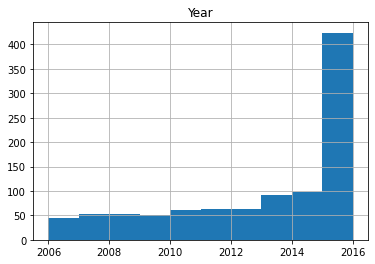

In [ ]:
# plot histogram of the column name year in movie dataframe, which shows how many movies release in a year.


year=list(movie['Year'].value_counts().index)

val=list(movie['Year'].value_counts().values)
year.sort()


#plt.xlim([2006,2016])

movie.hist(column="Year") 

#plt.yticks(np.arange(2006, 2017, 1))

#plt.ylim([2006,2016])

#plt.yticks(np.arange(2006, 2017, 1))

# Show plot
plt.show()



In [ ]:
# print the movie detail with title 'Grumpier Old Men'.


print(movie[movie['Title']=="Grumpier Old Men"])




Empty DataFrame
Columns: [Rank, Title, Genre, Description, Director, Actors, Year, Runtime_Minutes, Rating, Votes, Revenue_(Millions), Metascore]
Index: []


In [ ]:
# show those movies which are released after 1995-01-01
print(movie[movie['Year']>1994])




     Rank                                    Title                     Genre  \
773   774                        Lady in the Water     Drama,Fantasy,Mystery   
774   775                             The Fountain              Drama,Sci-Fi   
727   728                          The Illusionist     Drama,Mystery,Romance   
573   574                     Little Miss Sunshine              Comedy,Drama   
230   231                          Pan's Labyrinth         Drama,Fantasy,War   
..    ...                                      ...                       ...   
10     11  Fantastic Beasts and Where to Find Them  Adventure,Family,Fantasy   
890   891                               The Intent               Crime,Drama   
86     87                            Live by Night               Crime,Drama   
12     13                                Rogue One   Action,Adventure,Sci-Fi   
999  1000                               Nine Lives     Comedy,Family,Fantasy   

                                       

In [ ]:
# sort the movie DataFrame in decending order based on release_date

movie.sort_values(by=['Year'],inplace=True)



In [ ]:
# for each year, display the total number of movie with specific gerne for example Action=1000,adventure=400

#print(movie.groupby(['Year'])['Genre'].value_counts())

#print(pd.pivot_table(movie,index='Year',columns='Genre', aggfunc='count'))

#print(movie.groupby(['Year'])['Genre'].value_counts())

Y=[]

G=[]


for i in movie['Year']:

    if i not in Y:
        
        Y.append(int(i))

for i in movie['Genre']:
    
    string=i.split(",")
    
    for j in range(0,len(string)):
        
        if string[j] not in G:
            
            G.append(string[j])
        
for i in range(0,len(Y)):
    
    print("Year: ",Y[i])
    counts={}
    Year=movie[movie['Year']==Y[i]]
    for j in G:
        
        for k in Year['Genre']:
            
            string=k.split(",")
           
            if j in string:
            
                if j not in counts:
                    
                    counts[j]=1
                else:
                
                    counts[j]=counts[j]+1            
                

        
    print(counts)
    print("\n")


                
#fig = plt.figure(figsize = (25, 10))




# plot histogram the upper calculated total count


Year:  2006
{'Drama': 26, 'Fantasy': 6, 'Mystery': 8, 'Biography': 3, 'History': 1, 'Adventure': 13, 'Horror': 4, 'Crime': 7, 'Thriller': 10, 'Comedy': 12, 'Romance': 4, 'Animation': 2, 'Family': 1, 'Action': 11, 'Music': 1, 'Sci-Fi': 7, 'Sport': 3, 'War': 2}


Year:  2007
{'Drama': 28, 'Fantasy': 7, 'Mystery': 7, 'Biography': 4, 'History': 2, 'Adventure': 11, 'Horror': 11, 'Crime': 13, 'Thriller': 10, 'Comedy': 10, 'Romance': 4, 'Animation': 3, 'Family': 8, 'Action': 12, 'Music': 2, 'Sci-Fi': 5, 'Musical': 2}


Year:  2008
{'Drama': 22, 'Fantasy': 6, 'Mystery': 4, 'Biography': 4, 'History': 2, 'Adventure': 11, 'Horror': 4, 'Crime': 8, 'Thriller': 10, 'Comedy': 12, 'Romance': 12, 'Animation': 2, 'Family': 2, 'Action': 24, 'Music': 1, 'Sci-Fi': 6, 'Sport': 1, 'War': 2, 'Musical': 1}


Year:  2009
{'Drama': 23, 'Fantasy': 9, 'Mystery': 8, 'Biography': 3, 'Adventure': 18, 'Horror': 7, 'Crime': 5, 'Thriller': 8, 'Comedy': 14, 'Romance': 8, 'Animation': 4, 'Family': 4, 'Action': 14, 'Sci-Fi

![barchart.png](attachment:barchart.png)

In [ ]:
# filter the movies with specific gerne
# like show only those movies which are selected Action gerne

print(movie[movie['Genre']=="Action"])



     Rank                 Title   Genre  \
580   581  Kickboxer: Vengeance  Action   
123   124  Boyka: Undisputed IV  Action   

                                           Description         Director  \
580         A kick boxer is out to avenge his brother.   John Stockwell   
123  In the fourth installment of the fighting fran...  Todor Chapkanov   

                                                Actors  Year  Runtime_Minutes  \
580  Dave Bautista, Alain Moussi, Gina Carano, Jean...  2016               90   
123  Scott Adkins, Teodora Duhovnikova, Alon Aboutb...  2016               86   

     Rating  Votes  Revenue_(Millions)  Metascore  
580     4.9   6809          131.560000  37.000000  
123     7.4  10428           82.956376  58.985043  


     Rank               Title                    Genre  \
773   774   Lady in the Water    Drama,Fantasy,Mystery   
512   513       The Happening          Sci-Fi,Thriller   
581   582  The Last Airbender  Action,Adventure,Family   
948   949         After Earth  Action,Adventure,Sci-Fi   
318   319           The Visit   Comedy,Horror,Thriller   
2       3               Split          Horror,Thriller   

                                           Description            Director  \
773  Apartment building superintendent Cleveland He...  M. Night Shyamalan   
512  A science teacher, his wife, and a young girl ...  M. Night Shyamalan   
581  Follows the adventures of Aang, a young succes...  M. Night Shyamalan   
948  A crash landing leaves Kitai Raige and his fat...  M. Night Shyamalan   
318  Two siblings become increasingly frightened by...  M. Night Shyamalan   
2    Three girls are kidnapped by a man with a diag...  M. Night Shyamalan   

                                              

     Rank        Title                Genre  \
632   633     The Host  Comedy,Drama,Horror   
315   316  Snowpiercer  Action,Drama,Sci-Fi   

                                           Description      Director  \
632  A monster emerges from Seoul's Han River and f...  Bong Joon Ho   
315  Set in a future where a failed climate-change ...  Bong Joon Ho   

                                                Actors  Year  Runtime_Minutes  \
632  Kang-ho Song, Hee-Bong Byun, Hae-il Park, Doon...  2006              120   
315  Chris Evans, Jamie Bell, Tilda Swinton, Ed Harris  2013              126   

     Rating   Votes  Revenue_(Millions)  Metascore  
632     7.0   73491                2.20       85.0  
315     7.0  199048                4.56       84.0  


     Rank                   Title                     Genre  \
530   531             A Good Year      Comedy,Drama,Romance   
470   471       American Gangster     Biography,Crime,Drama   
737   738            Body of Lies      Action,D



     Rank                                         Title  \
314   315     Harry Potter and the Order of the Phoenix   
473   474        Harry Potter and the Half-Blood Prince   
418   419  Harry Potter and the Deathly Hallows: Part 1   
114   115  Harry Potter and the Deathly Hallows: Part 2   
107   108                          The Legend of Tarzan   
10     11       Fantastic Beasts and Where to Find Them   

                        Genre  \
314  Adventure,Family,Fantasy   
473  Adventure,Family,Fantasy   
418  Adventure,Family,Fantasy   
114   Adventure,Drama,Fantasy   
107    Action,Adventure,Drama   
10   Adventure,Family,Fantasy   

                                           Description     Director  \
314  With their warning about Lord Voldemort's retu...  David Yates   
473  As Harry Potter begins his sixth year at Hogwa...  David Yates   
418  As Harry races against time and evil to destro...  David Yates   
114  Harry, Ron and Hermione search for Voldemort's...  David Yates 

     Rank                     Title                    Genre  \
268   269  X-Men Origins: Wolverine  Action,Adventure,Sci-Fi   
766   767              Ender's Game            Action,Sci-Fi   
762   763            Eye in the Sky       Drama,Thriller,War   

                                           Description    Director  \
268  A look at Wolverine's early life, in particula...  Gavin Hood   
766  Young Ender Wiggin is recruited by the Interna...  Gavin Hood   
762  Col. Katherine Powell, a military officer in c...  Gavin Hood   

                                                Actors  Year  Runtime_Minutes  \
268  Hugh Jackman, Liev Schreiber, Ryan Reynolds, D...  2009              107   
766  Harrison Ford, Asa Butterfield, Hailee Steinfe...  2013              114   
762  Helen Mirren, Aaron Paul, Alan Rickman, Barkha...  2015              102   

     Rating   Votes  Revenue_(Millions)  Metascore  
268     6.7  388447              179.88  40.000000  
766     6.7  194236            

     Rank      Title               Genre  \
930   931  Footloose  Comedy,Drama,Music   

                                           Description      Director  \
930  City teenager Ren MacCormack moves to a small ...  Craig Brewer   

                                                Actors  Year  Runtime_Minutes  \
930  Kenny Wormald, Julianne Hough, Dennis Quaid,An...  2011              113   

     Rating  Votes  Revenue_(Millions)  Metascore  
930     5.9  39380               51.78       58.0  


     Rank      Title          Genre  \
832   833  Jane Eyre  Drama,Romance   

                                           Description            Director  \
832  A mousy governess who softens the heart of her...  Cary Joji Fukunaga   

                                                Actors  Year  Runtime_Minutes  \
832  Mia Wasikowska, Michael Fassbender, Jamie Bell...  2011              120   

     Rating  Votes  Revenue_(Millions)  Metascore  
832     7.4  67464               11.23       7

916     6.6  257395               85.02       51.0  


     Rank  Title                       Genre  \
589   590  Brave  Animation,Adventure,Comedy   

                                           Description      Director  \
589  Determined to make her own path in life, Princ...  Mark Andrews   

                                                Actors  Year  Runtime_Minutes  \
589  Kelly Macdonald,Billy Connolly, Emma Thompson,...  2012               93   

     Rating   Votes  Revenue_(Millions)  Metascore  
589     7.2  293941              237.28       69.0  


     Rank          Title                    Genre  \
887   888  The Lucky One            Drama,Romance   
47     48         Fallen  Adventure,Drama,Fantasy   

                                           Description     Director  \
887  A Marine travels to Louisiana after serving th...  Scott Hicks   
47   A young girl finds herself in a reform school ...  Scott Hicks   

                                                Actors  Ye

557     6.3  148504               55.94       40.0  


     Rank    Title            Genre  \
624   625  Taken 3  Action,Thriller   

                                           Description         Director  \
624  Ex-government operative Bryan Mills is accused...  Olivier Megaton   

                                                Actors  Year  Runtime_Minutes  \
624  Liam Neeson, Forest Whitaker, Maggie Grace,Fam...  2014              109   

     Rating   Votes  Revenue_(Millions)  Metascore  
624     6.0  144715               89.25       26.0  


     Rank            Title                  Genre  \
649   650  Vampire Academy  Action,Comedy,Fantasy   

                                           Description     Director  \
649  Rose Hathaway is a Dhampir, half human-half va...  Mark Waters   

                                                Actors  Year  Runtime_Minutes  \
649  Zoey Deutch, Lucy Fry, Danila Kozlovsky, Gabri...  2014              104   

     Rating  Votes  Revenue_(Mi



     Rank    Title                   Genre  \
554   555  Colonia  Drama,Romance,Thriller   

                                           Description              Director  \
554  A young woman's desperate search for her abduc...  Florian Gallenberger   

                                                Actors  Year  Runtime_Minutes  \
554  Emma Watson, Daniel Brühl, Michael Nyqvist,Ric...  2015              106   

     Rating  Votes  Revenue_(Millions)  Metascore  
554     7.1  30074           82.956376       33.0  


     Rank           Title                    Genre  \
552   553  Fantastic Four  Action,Adventure,Sci-Fi   

                                           Description    Director  \
552  Four young outsiders teleport to an alternate ...  Josh Trank   

                                                Actors  Year  Runtime_Minutes  \
552  Miles Teller, Kate Mara, Michael B. Jordan, Ja...  2015              100   

     Rating   Votes  Revenue_(Millions)  Metascore  
552     4


     Rank                               Title           Genre  \
181   182  The VVitch: A New-England Folktale  Horror,Mystery   

                                           Description       Director  \
181  A family in 1630s New England is torn apart by...  Robert Eggers   

                                                Actors  Year  Runtime_Minutes  \
181  Anya Taylor-Joy, Ralph Ineson, Kate Dickie, Ju...  2015               92   

     Rating   Votes  Revenue_(Millions)  Metascore  
181     6.8  101781               25.14       83.0  


     Rank                           Title         Genre  \
950   951  Me and Earl and the Dying Girl  Comedy,Drama   

                                           Description             Director  \
950  High schooler Greg, who spends most of his tim...  Alfonso Gomez-Rejon   

                                                Actors  Year  Runtime_Minutes  \
950  Thomas Mann, RJ Cyler, Olivia Cooke, Nick Offe...  2015              105   

     Rati

31     7.5  126030               10.64       67.0  


    Rank     Title   Genre                                        Description  \
30    31  Why Him?  Comedy  A holiday gathering threatens to go off the ra...   

        Director                                             Actors  Year  \
30  John Hamburg  Zoey Deutch, James Franco, Tangie Ambrose,Cedr...  2016   

    Runtime_Minutes  Rating  Votes  Revenue_(Millions)  Metascore  
30              111     6.3  48123               60.31       39.0  


     Rank           Title                  Genre  \
974   975  Queen of Katwe  Biography,Drama,Sport   

                                           Description   Director  \
974  A Ugandan girl sees her world rapidly change a...  Mira Nair   

                                                Actors  Year  Runtime_Minutes  \
974  Madina Nalwanga, David Oyelowo, Lupita Nyong'o...  2016              124   

     Rating  Votes  Revenue_(Millions)  Metascore  
974     7.4   6753             

     Rank     Title                  Genre  \
542   543  Spectral  Action,Mystery,Sci-Fi   

                                           Description     Director  \
542  A sci-fi/thriller story centered on a special-...  Nic Mathieu   

                                                Actors  Year  Runtime_Minutes  \
542  James Badge Dale, Emily Mortimer, Bruce Greenw...  2016              107   

     Rating  Votes  Revenue_(Millions)  Metascore  
542     6.3  27042           82.956376       39.0  


     Rank            Title          Genre  \
317   318  The Stakelander  Action,Horror   

                                           Description  Director  \
317  When his home of New Eden is destroyed by a re...  Dan Berk   

                                                Actors  Year  Runtime_Minutes  \
317  Connor Paolo, Nick Damici, Laura Abramsen, A.C...  2016               81   

     Rating  Votes  Revenue_(Millions)  Metascore  
317     5.3   1263           82.956376  58.985043  




     Rank       Title           Genre  \
184   185  Forushande  Drama,Thriller   

                                           Description        Director  \
184  While both participating in a production of "D...  Asghar Farhadi   

                                                Actors  Year  Runtime_Minutes  \
184  Taraneh Alidoosti, Shahab Hosseini, Babak Kari...  2016              124   

     Rating  Votes  Revenue_(Millions)  Metascore  
184     8.0  22389                 3.4       85.0  


     Rank   Title            Genre  \
692   693  Genius  Biography,Drama   

                                           Description          Director  \
692  A chronicle of Max Perkins's time as the book ...  Michael Grandage   

                                                Actors  Year  Runtime_Minutes  \
692  Colin Firth, Jude Law, Nicole Kidman, Laura Li...  2016              104   

     Rating  Votes  Revenue_(Millions)  Metascore  
692     6.5  10708                1.36  58.985043  


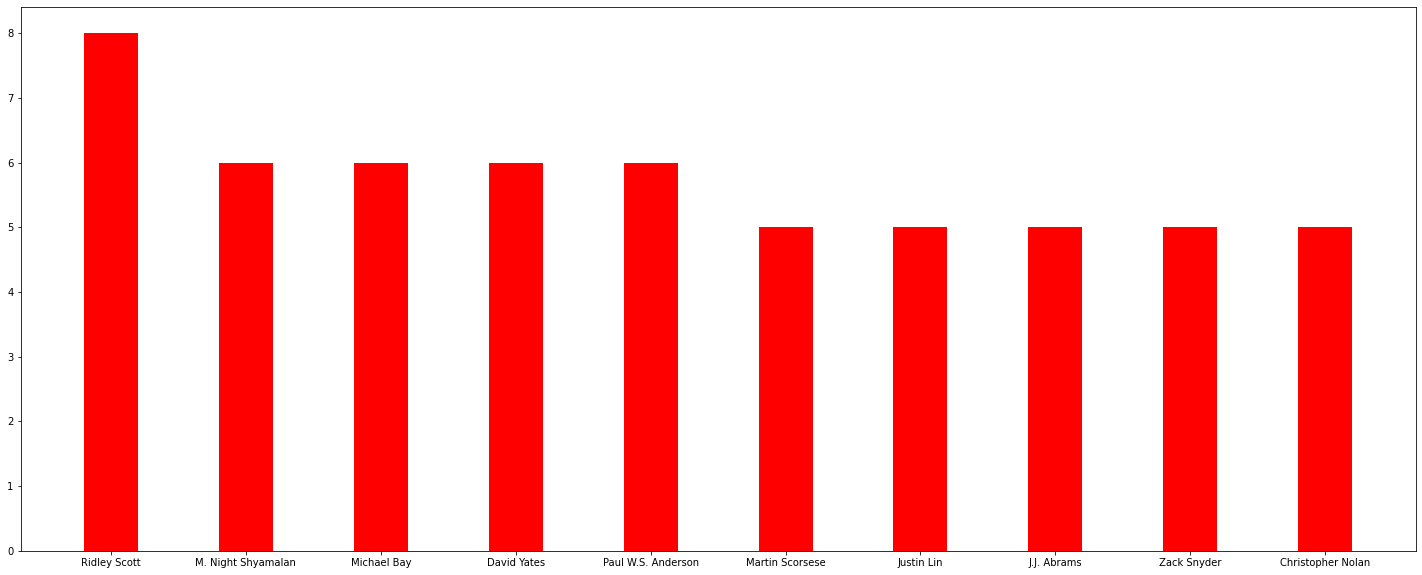

In [ ]:
# for each Director, display all the movies with detail.
# for each Director, display all the movies with detail.

D=movie['Director']

Direct=[]

for i in D:
    
    if i not in Direct:
        
        Direct.append(i)


for i in Direct:
    
    print(movie[movie['Director']==i])
    print("\n")


# count the movies and plot barchart top 10 director's movies.

C={}



for i in Direct:
    j=movie[movie['Director']==i]
    C[i]=j['Title'].count()
    
from heapq import nlargest
top=nlargest(10, C, key = C.get)
key=[]

for i in top:
    
    key.append(movie_count[i])


fig = plt.figure(figsize = (25, 10))
#plt.bar(*zip(*movie_count.items()))

plt.bar(top,key ,0.4,color='red')
plt.show()

In [ ]:
# for each Actor, display all the movies with detail.
Act=movie['Actors']

Actor=[]

for i in Act:
    
    string=i.split(",")
    for j in range(0,len(string)):
        
        if string[j] not in Actor:
            
            Actor.append(string[j])

            
for i in Actor:
    
    for j in Act:

        string=j.split(",")
        
        if i in string:
            
            print(movie[movie['Actors']==j])
        
        





     Rank              Title                  Genre  \
773   774  Lady in the Water  Drama,Fantasy,Mystery   

                                           Description            Director  \
773  Apartment building superintendent Cleveland He...  M. Night Shyamalan   

                                                Actors  Year  Runtime_Minutes  \
773  Paul Giamatti, Bryce Dallas Howard, Jeffrey Wr...  2006              110   

     Rating  Votes  Revenue_(Millions)  Metascore  
773     5.6  82701               42.27       36.0  
     Rank              Title                  Genre  \
773   774  Lady in the Water  Drama,Fantasy,Mystery   

                                           Description            Director  \
773  Apartment building superintendent Cleveland He...  M. Night Shyamalan   

                                                Actors  Year  Runtime_Minutes  \
773  Paul Giamatti, Bryce Dallas Howard, Jeffrey Wr...  2006              110   

     Rating  Votes  Revenue_(Milli

     Rank Title                       Genre  \
221   222  Cars  Animation,Adventure,Comedy   

                                           Description       Director  \
221  A hot-shot race-car named Lightning McQueen ge...  John Lasseter   

                                                Actors  Year  Runtime_Minutes  \
221  Owen Wilson, Bonnie Hunt, Paul Newman, Larry t...  2006              117   

     Rating   Votes  Revenue_(Millions)  Metascore  
221     7.1  283445              244.05       73.0  
     Rank Title                       Genre  \
221   222  Cars  Animation,Adventure,Comedy   

                                           Description       Director  \
221  A hot-shot race-car named Lightning McQueen ge...  John Lasseter   

                                                Actors  Year  Runtime_Minutes  \
221  Owen Wilson, Bonnie Hunt, Paul Newman, Larry t...  2006              117   

     Rating   Votes  Revenue_(Millions)  Metascore  
221     7.1  283445            

270     7.8  547386              304.36       81.0  
     Rank    Title                      Genre  \
169   170  Spectre  Action,Adventure,Thriller   

                                           Description    Director  \
169  A cryptic message from Bond's past sends him o...  Sam Mendes   

                                                Actors  Year  Runtime_Minutes  \
169  Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...  2015              148   

     Rating   Votes  Revenue_(Millions)  Metascore  
169     6.8  308981              200.07       60.0  
     Rank          Title                      Genre  \
164   165  Casino Royale  Action,Adventure,Thriller   

                                           Description         Director  \
164  Armed with a licence to kill, Secret Agent Jam...  Martin Campbell   

                                                Actors  Year  Runtime_Minutes  \
164  Daniel Craig, Eva Green, Judi Dench, Jeffrey W...  2006              144   

     Rating  

     Rank  Title  Genre                                        Description  \
885   886  Babel  Drama  Tragedy strikes a married couple on vacation i...   

                        Director  \
885  Alejandro González Iñárritu   

                                                Actors  Year  Runtime_Minutes  \
885  Brad Pitt, Cate Blanchett, Gael García Bernal,...  2006              143   

     Rating   Votes  Revenue_(Millions)  Metascore  
885     7.5  253417                34.3       69.0  
     Rank                                              Title  \
613   614  The Assassination of Jesse James by the Coward...   

                     Genre                                        Description  \
613  Biography,Crime,Drama  Robert Ford, who's idolized Jesse James since ...   

           Director                                             Actors  Year  \
613  Andrew Dominik  Brad Pitt, Casey Affleck, Sam Shepard, Mary-Lo...  2007   

     Runtime_Minutes  Rating   Votes  Revenue_(M

     Rank             Title                    Genre  \
924   925  Superman Returns  Action,Adventure,Sci-Fi   

                                           Description      Director  \
924  Superman reappears after a long absence, but i...  Bryan Singer   

                                                Actors  Year  Runtime_Minutes  \
924  Brandon Routh, Kevin Spacey, Kate Bosworth, Ja...  2006              154   

     Rating   Votes  Revenue_(Millions)  Metascore  
924     6.1  246797              200.07       72.0  
     Rank Title                 Genre  \
850   851    21  Crime,Drama,Thriller   

                                           Description        Director  \
850  "21" is the fact-based story about six MIT stu...  Robert Luketic   

                                                Actors  Year  Runtime_Minutes  \
850  Jim Sturgess, Kate Bosworth, Kevin Spacey, Aar...  2008              123   

     Rating   Votes  Revenue_(Millions)  Metascore  
850     6.8  198395      

584     7.6  297395               75.61       87.0  
     Rank                            Title                     Genre  \
578   579  The Hunger Games: Catching Fire  Action,Adventure,Mystery   

                                           Description          Director  \
578  Katniss Everdeen and Peeta Mellark become targ...  Francis Lawrence   

                                                Actors  Year  Runtime_Minutes  \
578  Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...  2013              146   

     Rating   Votes  Revenue_(Millions)  Metascore  
578     7.6  525646              424.65       76.0  
     Rank Title               Genre  \
113   114   300  Action,Fantasy,War   

                                           Description     Director  \
113  King Leonidas of Sparta and a force of 300 men...  Zack Snyder   

                                                Actors  Year  Runtime_Minutes  \
113  Gerard Butler, Lena Headey, David Wenham, Domi...  2006              117

     Rank                         Title   Genre  \
292   293  Neighbors 2: Sorority Rising  Comedy   

                                           Description          Director  \
292  When their new next-door neighbors turn out to...  Nicholas Stoller   

                                                Actors  Year  Runtime_Minutes  \
292  Seth Rogen, Rose Byrne, Zac Efron, Chloë Grace...  2016               92   

     Rating  Votes  Revenue_(Millions)  Metascore  
292     5.7  76327               55.29       58.0  
     Rank     Title                      Genre  \
588   589  Sunshine  Adventure,Sci-Fi,Thriller   

                                           Description     Director  \
588  A team of international astronauts are sent on...  Danny Boyle   

                                                Actors  Year  Runtime_Minutes  \
588  Cillian Murphy, Rose Byrne, Chris Evans, Miche...  2007              107   

     Rating   Votes  Revenue_(Millions)  Metascore  
588     7.3  1998

     Rank          Title               Genre  \
305   306  Inherent Vice  Comedy,Crime,Drama   

                                           Description              Director  \
305  In 1970, drug-fueled Los Angeles private inves...  Paul Thomas Anderson   

                                                Actors  Year  Runtime_Minutes  \
305  Joaquin Phoenix, Josh Brolin, Owen Wilson,Kath...  2014              148   

     Rating  Votes  Revenue_(Millions)  Metascore  
305     6.7  69509                8.09       81.0  
     Rank                         Title                  Genre  \
426   427  Sin City: A Dame to Kill For  Action,Crime,Thriller   

                                           Description      Director  \
426  Some of Sin City's most hard-boiled citizens c...  Frank Miller   

                                                Actors  Year  Runtime_Minutes  \
426  Mickey Rourke, Jessica Alba, Josh Brolin, Jose...  2014              102   

     Rating   Votes  Revenue_(Mill

    Rank         Title                 Genre  \
58    59  Their Finest  Comedy,Drama,Romance   

                                          Description       Director  \
58  A former secretary, newly appointed as a scrip...  Lone Scherfig   

                                               Actors  Year  Runtime_Minutes  \
58  Gemma Arterton, Sam Claflin, Bill Nighy, Jack ...  2016              117   

    Rating  Votes  Revenue_(Millions)  Metascore  
58     7.0   3739                3.18       76.0  
     Rank             Title               Genre  \
991   992  Taare Zameen Par  Drama,Family,Music   

                                           Description    Director  \
991  An eight-year-old boy is thought to be a lazy ...  Aamir Khan   

                                                Actors  Year  Runtime_Minutes  \
991  Darsheel Safary, Aamir Khan, Tanay Chheda, Sac...  2007              165   

     Rating   Votes  Revenue_(Millions)  Metascore  
991     8.5  102697                

     Rank           Title                Genre  \
875   876  28 Weeks Later  Drama,Horror,Sci-Fi   

                                           Description  \
875  Six months after the rage virus was inflicted ...   

                    Director  \
875  Juan Carlos Fresnadillo   

                                                Actors  Year  Runtime_Minutes  \
875  Jeremy Renner, Rose Byrne, Robert Carlyle, Har...  2007              100   

     Rating   Votes  Revenue_(Millions)  Metascore  
875     7.0  221858               28.64       78.0  
     Rank            Title                   Genre  \
672   673  The Hurt Locker  Drama,History,Thriller   

                                           Description         Director  \
672  During the Iraq War, a Sergeant recently assig...  Kathryn Bigelow   

                                                Actors  Year  Runtime_Minutes  \
672  Jeremy Renner, Anthony Mackie, Brian Geraghty,...  2008              131   

     Rating   Votes  Reve

     Rank                Title                     Genre  \
547   548  Alice in Wonderland  Adventure,Family,Fantasy   

                                           Description    Director  \
547  Nineteen-year-old Alice returns to the magical...  Tim Burton   

                                                Actors  Year  Runtime_Minutes  \
547  Mia Wasikowska, Johnny Depp, Helena Bonham Car...  2010              108   

     Rating   Votes  Revenue_(Millions)  Metascore  
547     6.5  324898              334.19       53.0  
     Rank              Title            Genre  \
685   686  The King's Speech  Biography,Drama   

                                           Description    Director  \
685  The story of King George VI of the United King...  Tom Hooper   

                                                Actors  Year  Runtime_Minutes  \
685  Colin Firth, Geoffrey Rush, Helena Bonham Cart...  2010              118   

     Rating   Votes  Revenue_(Millions)  Metascore  
685     8.0  

     Rank                 Title                Genre  \
199   200  Central Intelligence  Action,Comedy,Crime   

                                           Description  \
199  After he reconnects with an awkward pal from h...   

                    Director  \
199  Rawson Marshall Thurber   

                                                Actors  Year  Runtime_Minutes  \
199  Dwayne Johnson, Kevin Hart, Danielle Nicolet, ...  2016              107   

     Rating  Votes  Revenue_(Millions)  Metascore  
199     6.3  97082              127.38       52.0  
     Rank            Title                  Genre  \
298   299  The Infiltrator  Biography,Crime,Drama   

                                           Description     Director  \
298  A U.S. Customs official uncovers a money laund...  Brad Furman   

                                                Actors  Year  Runtime_Minutes  \
298  Bryan Cranston, John Leguizamo, Diane Kruger, ...  2016              127   

     Rating  Votes  Reven

     Rank                                              Title  \
767   768  Indiana Jones and the Kingdom of the Crystal S...   

                        Genre  \
767  Action,Adventure,Fantasy   

                                           Description          Director  \
767  Famed archaeologist/adventurer Dr. Henry "Indi...  Steven Spielberg   

                                                Actors  Year  Runtime_Minutes  \
767  Harrison Ford, Cate Blanchett, Shia LaBeouf,Ka...  2008              122   

     Rating   Votes  Revenue_(Millions)  Metascore  
767     6.2  351361              317.01       65.0  
     Rank         Title          Genre  \
766   767  Ender's Game  Action,Sci-Fi   

                                           Description    Director  \
766  Young Ender Wiggin is recruited by the Interna...  Gavin Hood   

                                                Actors  Year  Runtime_Minutes  \
766  Harrison Ford, Asa Butterfield, Hailee Steinfe...  2013              1

287     5.3  150121               47.38       40.0  
     Rank                           Title      Genre  \
510   511  The Boy in the Striped Pyjamas  Drama,War   

                                           Description     Director  \
510  Set during WWII, a story seen through the inno...  Mark Herman   

                                                Actors  Year  Runtime_Minutes  \
510  Asa Butterfield, David Thewlis, Rupert Friend,...  2008               94   

     Rating   Votes  Revenue_(Millions)  Metascore  
510     7.8  144614                9.03       55.0  
     Rank Title                   Genre  \
735   736  Hugo  Adventure,Drama,Family   

                                           Description         Director  \
735  In Paris in 1931, an orphan named Hugo Cabret ...  Martin Scorsese   

                                                Actors  Year  Runtime_Minutes  \
735  Asa Butterfield, Chloë Grace Moretz, Christoph...  2011              126   

     Rating   Votes  

347     7.3  379088              150.12       90.0  
   Rank                    Title                    Genre  \
0     1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   

                                         Description    Director  \
0  A group of intergalactic criminals are forced ...  James Gunn   

                                              Actors  Year  Runtime_Minutes  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014              121   

   Rating   Votes  Revenue_(Millions)  Metascore  
0     8.1  757074              333.13       76.0  
     Rank Title  Genre                                        Description  \
351   352   Joy  Drama  Joy is the story of the title character, who r...   

             Director                                             Actors  \
351  David O. Russell  Jennifer Lawrence, Robert De Niro, Bradley Coo...   

     Year  Runtime_Minutes  Rating  Votes  Revenue_(Millions)  Metascore  
351  2015              124     6.6  97679  

712     7.3  50388               50.15       67.0  
    Rank             Title                    Genre  \
48    49  Star Trek Beyond  Action,Adventure,Sci-Fi   

                                          Description    Director  \
48  The USS Enterprise crew explores the furthest ...  Justin Lin   

                                               Actors  Year  Runtime_Minutes  \
48  Chris Pine, Zachary Quinto, Karl Urban, Zoe Sa...  2016              122   

    Rating   Votes  Revenue_(Millions)  Metascore  
48     7.1  164567               158.8       68.0  
    Rank   Title                     Genre  \
87    88  Avatar  Action,Adventure,Fantasy   

                                          Description       Director  \
87  A paraplegic marine dispatched to the moon Pan...  James Cameron   

                                               Actors  Year  Runtime_Minutes  \
87  Sam Worthington, Zoe Saldana, Sigourney Weaver...  2009              162   

    Rating   Votes  Revenue_(Milli

889     7.7  281625               34.96       72.0  
     Rank         Title                 Genre  \
957   958  End of Watch  Crime,Drama,Thriller   

                                           Description    Director  \
957  Shot documentary-style, this film follows the ...  David Ayer   

                                                Actors  Year  Runtime_Minutes  \
957  Jake Gyllenhaal, Michael Peña, Anna Kendrick, ...  2012              109   

     Rating   Votes  Revenue_(Millions)  Metascore  
957     7.7  192190               40.98       68.0  
     Rank        Title                 Genre  \
707   708  The Hollars  Comedy,Drama,Romance   

                                           Description        Director  \
707  A man returns to his small hometown after lear...  John Krasinski   

                                                Actors  Year  Runtime_Minutes  \
707  Sharlto Copley, Charlie Day, Richard Jenkins, ...  2016               88   

     Rating  Votes  Revenue_(

     Rank     Title          Genre  \
219   220  Kick-Ass  Action,Comedy   

                                           Description        Director  \
219  Dave Lizewski is an unnoticed high school stud...  Matthew Vaughn   

                                                Actors  Year  Runtime_Minutes  \
219  Aaron Taylor-Johnson, Nicolas Cage, Chloë Grac...  2010              117   

     Rating   Votes  Revenue_(Millions)  Metascore  
219     7.7  456749               48.04       66.0  
     Rank      Title                 Genre  \
595   596  Let Me In  Drama,Horror,Mystery   

                                           Description     Director  \
595  A bullied young boy befriends a young female v...  Matt Reeves   

                                                Actors  Year  Runtime_Minutes  \
595  Kodi Smit-McPhee, Chloë Grace Moretz, Richard ...  2010              116   

     Rating  Votes  Revenue_(Millions)  Metascore  
595     7.2  97141               12.13       79.0  
  

     Rank Title                       Genre  \
499   500    Up  Animation,Adventure,Comedy   

                                           Description     Director  \
499  Seventy-eight year old Carl Fredricksen travel...  Pete Docter   

                                                Actors  Year  Runtime_Minutes  \
499  Edward Asner, Jordan Nagai, John Ratzenberger,...  2009               96   

     Rating   Votes  Revenue_(Millions)  Metascore  
499     8.3  722203              292.98       88.0  
     Rank Title                       Genre  \
499   500    Up  Animation,Adventure,Comedy   

                                           Description     Director  \
499  Seventy-eight year old Carl Fredricksen travel...  Pete Docter   

                                                Actors  Year  Runtime_Minutes  \
499  Edward Asner, Jordan Nagai, John Ratzenberger,...  2009               96   

     Rating   Votes  Revenue_(Millions)  Metascore  
499     8.3  722203              292.98

521     5.3  84927               16.97       48.0  
     Rank    Title      Genre  \
479   480  Macbeth  Drama,War   

                                           Description       Director  \
479  Macbeth, the Thane of Glamis, receives a proph...  Justin Kurzel   

                                                Actors  Year  Runtime_Minutes  \
479  Michael Fassbender, Marion Cotillard, Jack Mad...  2015              113   

     Rating  Votes  Revenue_(Millions)  Metascore  
479     6.7  41642           82.956376       71.0  
     Rank       Title            Genre  \
392   393  Steve Jobs  Biography,Drama   

                                           Description     Director  \
392  Steve Jobs takes us behind the scenes of the d...  Danny Boyle   

                                                Actors  Year  Runtime_Minutes  \
392  Michael Fassbender, Kate Winslet, Seth Rogen, ...  2015              122   

     Rating   Votes  Revenue_(Millions)  Metascore  
392     7.2  116112    

     Rank         Title                  Genre  \
670   671  Devil's Knot  Biography,Crime,Drama   

                                           Description     Director  \
670  The savage murders of three young children spa...  Atom Egoyan   

                                                Actors  Year  Runtime_Minutes  \
670  Colin Firth, Reese Witherspoon, Alessandro Niv...  2013              114   

     Rating  Votes  Revenue_(Millions)  Metascore  
670     6.1  15514           82.956376       42.0  
    Rank                         Title                    Genre  \
65    66  Kingsman: The Secret Service  Action,Adventure,Comedy   

                                          Description        Director  \
65  A spy organization recruits an unrefined, but ...  Matthew Vaughn   

                                               Actors  Year  Runtime_Minutes  \
65  Colin Firth, Taron Egerton, Samuel L. Jackson,...  2014              129   

    Rating   Votes  Revenue_(Millions)  Metasc

129     8.0  499424              183.64       76.0  
     Rank                Title           Genre  \
943   944  What's Your Number?  Comedy,Romance   

                                           Description    Director  \
943  A woman looks back at the past nineteen men sh...  Mark Mylod   

                                                Actors  Year  Runtime_Minutes  \
943  Anna Faris, Chris Evans, Ari Graynor, Blythe D...  2011              106   

     Rating  Votes  Revenue_(Millions)  Metascore  
943     6.1  62095               13.99       35.0  
     Rank                Title           Genre  \
943   944  What's Your Number?  Comedy,Romance   

                                           Description    Director  \
943  A woman looks back at the past nineteen men sh...  Mark Mylod   

                                                Actors  Year  Runtime_Minutes  \
943  Anna Faris, Chris Evans, Ari Graynor, Blythe D...  2011              106   

     Rating  Votes  Revenue_(Mill

     Rank         Title                 Genre  \
972   973  Rock of Ages  Comedy,Drama,Musical   

                                           Description       Director  \
972  A small town girl and a city boy meet on the S...  Adam Shankman   

                                                Actors  Year  Runtime_Minutes  \
972  Julianne Hough, Diego Boneta, Tom Cruise, Alec...  2012              123   

     Rating  Votes  Revenue_(Millions)  Metascore  
972     5.9  64513               38.51       47.0  
     Rank       Title                   Genre  \
487   488  Safe Haven  Drama,Romance,Thriller   

                                           Description         Director  \
487  A young woman with a mysterious past lands in ...  Lasse Hallström   

                                                Actors  Year  Runtime_Minutes  \
487  Julianne Hough, Josh Duhamel, Cobie Smulders,D...  2013              115   

     Rating  Votes  Revenue_(Millions)  Metascore  
487     6.7  84765    

291     7.2  226631                65.0       66.0  
     Rank           Title                  Genre  \
245   246  Les Misérables  Drama,Musical,Romance   

                                           Description    Director  \
245  In 19th-century France, Jean Valjean, who for ...  Tom Hooper   

                                                Actors  Year  Runtime_Minutes  \
245  Hugh Jackman, Russell Crowe, Anne Hathaway,Ama...  2012              158   

     Rating   Votes  Revenue_(Millions)  Metascore  
245     7.6  257426              148.78       63.0  
     Rank                              Title                   Genre  \
745   746  A Million Ways to Die in the West  Comedy,Romance,Western   

                                           Description         Director  \
745  As a cowardly farmer begins to fall for the my...  Seth MacFarlane   

                                                Actors  Year  Runtime_Minutes  \
745  Seth MacFarlane, Charlize Theron, Liam Neeson,... 

     Rank             Title                   Genre  \
881   882  Saving Mr. Banks  Biography,Comedy,Drama   

                                           Description          Director  \
881  Author P.L. Travers reflects on her childhood ...  John Lee Hancock   

                                                Actors  Year  Runtime_Minutes  \
881  Emma Thompson, Tom Hanks, Annie Rose Buckley, ...  2013              125   

     Rating   Votes  Revenue_(Millions)  Metascore  
881     7.5  125693                83.3       65.0  
     Rank             Title                   Genre  \
881   882  Saving Mr. Banks  Biography,Comedy,Drama   

                                           Description          Director  \
881  Author P.L. Travers reflects on her childhood ...  John Lee Hancock   

                                                Actors  Year  Runtime_Minutes  \
881  Emma Thompson, Tom Hanks, Annie Rose Buckley, ...  2013              125   

     Rating   Votes  Revenue_(Millions) 

     Rank           Title                Genre  \
276   277  22 Jump Street  Action,Comedy,Crime   

                                           Description   Director  \
276  After making their way through high school (tw...  Phil Lord   

                                                Actors  Year  Runtime_Minutes  \
276  Channing Tatum, Jonah Hill, Ice Cube,Nick Offe...  2014              112   

     Rating   Votes  Revenue_(Millions)  Metascore  
276     7.1  280110              191.62       71.0  
     Rank        Title   Genre  \
394   395  Grown Ups 2  Comedy   

                                           Description      Director  \
394  After moving his family back to his hometown t...  Dennis Dugan   

                                                Actors  Year  Runtime_Minutes  \
394  Adam Sandler, Kevin James, Chris Rock, David S...  2013              101   

     Rating   Votes  Revenue_(Millions)  Metascore  
394     5.4  114482              133.67       19.0  
     Ran

     Rank        Title                    Genre  \
432   433  World War Z  Action,Adventure,Horror   

                                           Description      Director  \
432  Former United Nations employee Gerry Lane trav...  Marc Forster   

                                                Actors  Year  Runtime_Minutes  \
432  Brad Pitt, Mireille Enos, Daniella Kertesz, Ja...  2013              116   

     Rating   Votes  Revenue_(Millions)  Metascore  
432     7.0  494819              202.35       63.0  
     Rank     Title           Genre  \
508   509  Movie 43  Comedy,Romance   

                                           Description         Director  \
508  A series of interconnected short films follows...  Elizabeth Banks   

                                                Actors  Year  Runtime_Minutes  \
508  Emma Stone, Stephen Merchant, Richard Gere, Li...  2013               94   

     Rating  Votes  Revenue_(Millions)  Metascore  
508     4.3  83625                8.83

749     5.9  91684               68.56       39.0  
     Rank                           Title                     Genre  \
749   750  Percy Jackson: Sea of Monsters  Adventure,Family,Fantasy   

                                           Description          Director  \
749  In order to restore their dying safe haven, th...  Thor Freudenthal   

                                                Actors  Year  Runtime_Minutes  \
749  Logan Lerman, Alexandra Daddario, Brandon T. J...  2013              106   

     Rating  Votes  Revenue_(Millions)  Metascore  
749     5.9  91684               68.56       39.0  
     Rank    Title                 Genre  \
213   214  Old Boy  Action,Drama,Mystery   

                                           Description   Director  \
213  Obsessed with vengeance, a man sets out to fin...  Spike Lee   

                                                Actors  Year  Runtime_Minutes  \
213  Josh Brolin, Elizabeth Olsen, Samuel L. Jackso...  2013              10

    Rank           Title                    Genre  \
85    86  Jurassic World  Action,Adventure,Sci-Fi   

                                          Description         Director  \
85  A new theme park, built on the original site o...  Colin Trevorrow   

                                               Actors  Year  Runtime_Minutes  \
85  Chris Pratt, Bryce Dallas Howard, Ty Simpkins,...  2015              124   

    Rating   Votes  Revenue_(Millions)  Metascore  
85     7.0  455169              652.18       59.0  
     Rank           Title                       Genre  \
384   385  The Lego Movie  Animation,Action,Adventure   

                                           Description   Director  \
384  An ordinary Lego construction worker, thought ...  Phil Lord   

                                                Actors  Year  Runtime_Minutes  \
384  Chris Pratt, Will Ferrell, Elizabeth Banks, Wi...  2014              100   

     Rating   Votes  Revenue_(Millions)  Metascore  
384     7

354     6.3  171970               130.0       42.0  
     Rank                   Title          Genre  \
338   339  The Fault in Our Stars  Drama,Romance   

                                           Description    Director  \
338  Two teenage cancer patients begin a life-affir...  Josh Boone   

                                                Actors  Year  Runtime_Minutes  \
338  Shailene Woodley, Ansel Elgort, Nat Wolff, Lau...  2014              126   

     Rating   Votes  Revenue_(Millions)  Metascore  
338     7.8  271301              124.87       69.0  
     Rank                   Title          Genre  \
338   339  The Fault in Our Stars  Drama,Romance   

                                           Description    Director  \
338  Two teenage cancer patients begin a life-affir...  Josh Boone   

                                                Actors  Year  Runtime_Minutes  \
338  Shailene Woodley, Ansel Elgort, Nat Wolff, Lau...  2014              126   

     Rating   Votes  Re

     Rank               Title         Genre  \
247   248  20th Century Women  Comedy,Drama   

                                           Description    Director  \
247  The story of a teenage boy, his mother, and tw...  Mike Mills   

                                                Actors  Year  Runtime_Minutes  \
247  Annette Bening, Elle Fanning, Greta Gerwig, Bi...  2016              119   

     Rating  Votes  Revenue_(Millions)  Metascore  
247     7.4  14708                5.66       83.0  
    Rank          Title        Genre  \
86    87  Live by Night  Crime,Drama   

                                          Description     Director  \
86  A group of Boston-bred gangsters set up shop i...  Ben Affleck   

                                               Actors  Year  Runtime_Minutes  \
86  Ben Affleck, Elle Fanning, Brendan Gleeson, Ch...  2016              129   

    Rating  Votes  Revenue_(Millions)  Metascore  
86     6.4  27869               10.38       49.0  
     Rank   

     Rank            Title                  Genre  \
649   650  Vampire Academy  Action,Comedy,Fantasy   

                                           Description     Director  \
649  Rose Hathaway is a Dhampir, half human-half va...  Mark Waters   

                                                Actors  Year  Runtime_Minutes  \
649  Zoey Deutch, Lucy Fry, Danila Kozlovsky, Gabri...  2014              104   

     Rating  Votes  Revenue_(Millions)  Metascore  
649     5.6  44111                7.79       30.0  
     Rank                   Title   Genre  \
278   279  Everybody Wants Some!!  Comedy   

                                           Description           Director  \
278  In 1980, a group of college baseball players n...  Richard Linklater   

                                                Actors  Year  Runtime_Minutes  \
278  Blake Jenner, Tyler Hoechlin, Ryan Guzman,Zoey...  2016              117   

     Rating  Votes  Revenue_(Millions)  Metascore  
278     7.0  36312    

987     6.3  33688               23.39       30.0  
     Rank         Title          Genre  \
987   988  Endless Love  Drama,Romance   

                                           Description     Director  \
987  The story of a privileged girl and a charismat...  Shana Feste   

                                                Actors  Year  Runtime_Minutes  \
987  Gabriella Wilde, Alex Pettyfer, Bruce Greenwoo...  2014              104   

     Rating  Votes  Revenue_(Millions)  Metascore  
987     6.3  33688               23.39       30.0  
     Rank     Title                  Genre  \
542   543  Spectral  Action,Mystery,Sci-Fi   

                                           Description     Director  \
542  A sci-fi/thriller story centered on a special-...  Nic Mathieu   

                                                Actors  Year  Runtime_Minutes  \
542  James Badge Dale, Emily Mortimer, Bruce Greenw...  2016              107   

     Rating  Votes  Revenue_(Millions)  Metascore  
54

     Rank    Title                   Genre  \
693   694  Pompeii  Action,Adventure,Drama   

                                           Description            Director  \
693  A slave-turned-gladiator finds himself in a ra...  Paul W.S. Anderson   

                                                Actors  Year  Runtime_Minutes  \
693  Kit Harington, Emily Browning, Kiefer Sutherla...  2014              105   

     Rating  Votes  Revenue_(Millions)  Metascore  
693     5.5  90188               23.22       39.0  
     Rank                              Title                   Genre  \
745   746  A Million Ways to Die in the West  Comedy,Romance,Western   

                                           Description         Director  \
745  As a cowardly farmer begins to fall for the my...  Seth MacFarlane   

                                                Actors  Year  Runtime_Minutes  \
745  Seth MacFarlane, Charlize Theron, Liam Neeson,...  2014              116   

     Rating   Votes  Rev

     Rank           Title            Genre  \
116   117  The Neon Demon  Horror,Thriller   

                                           Description              Director  \
116  When aspiring model Jesse moves to Los Angeles...  Nicolas Winding Refn   

                                                Actors  Year  Runtime_Minutes  \
116  Elle Fanning, Christina Hendricks, Keanu Reeve...  2016              118   

     Rating  Votes  Revenue_(Millions)  Metascore  
116     6.2  50359                1.33       51.0  
     Rank Title          Genre  \
185   186  Love  Drama,Romance   

                                           Description    Director  \
185  Murphy is an American living in Paris who ente...  Gaspar Noé   

                                                Actors  Year  Runtime_Minutes  \
185  Aomi Muyock, Karl Glusman, Klara Kristin, Juan...  2015              135   

     Rating  Votes  Revenue_(Millions)  Metascore  
185     6.0  24003           82.956376       51.0  
  

     Rank               Title                    Genre  \
243   244  Terminator Genisys  Action,Adventure,Sci-Fi   

                                           Description     Director  \
243  When John Connor, leader of the human resistan...  Alan Taylor   

                                                Actors  Year  Runtime_Minutes  \
243  Arnold Schwarzenegger, Jason Clarke, Emilia Cl...  2015              126   

     Rating   Votes  Revenue_(Millions)  Metascore  
243     6.5  205365               89.73       38.0  
     Rank                    Title                    Genre  \
104   105  The Man from U.N.C.L.E.  Action,Adventure,Comedy   

                                           Description     Director  \
104  In the early 1960s, CIA agent Napoleon Solo an...  Guy Ritchie   

                                                Actors  Year  Runtime_Minutes  \
104  Henry Cavill, Armie Hammer, Alicia Vikander, E...  2015              116   

     Rating   Votes  Revenue_(Millions

     Rank     Title         Genre  \
206   207  Raw (II)  Drama,Horror   

                                           Description         Director  \
206  When a young vegetarian undergoes a carnivorou...  Julia Ducournau   

                                                Actors  Year  Runtime_Minutes  \
206  Garance Marillier, Ella Rumpf, Rabah Nait Oufe...  2016               99   

     Rating  Votes  Revenue_(Millions)  Metascore  
206     7.5   5435                0.51       81.0  
     Rank      Title                Genre  \
966   967  L'odyssée  Adventure,Biography   

                                           Description      Director  \
966  Highly influential and a fearlessly ambitious ...  Jérôme Salle   

                                                Actors  Year  Runtime_Minutes  \
966  Lambert Wilson, Pierre Niney, Audrey Tautou,La...  2016              122   

     Rating  Votes  Revenue_(Millions)  Metascore  
966     6.7   1810           82.956376       70.0  
    

     Rank          Title           Genre  \
393   394  Whisky Galore  Comedy,Romance   

                                           Description           Director  \
393  Scottish islanders try to plunder cases of whi...  Gillies MacKinnon   

                                                Actors  Year  Runtime_Minutes  \
393  Tim Pigott-Smith, Naomi Battrick, Ellie Kendri...  2016               98   

     Rating  Votes  Revenue_(Millions)  Metascore  
393     5.0    102           82.956376       43.0  
     Rank  Title          Genre  \
390   391  Keanu  Action,Comedy   

                                           Description       Director  \
390  When an L.A. drug kingpin's kitten unexpectedl...  Peter Atencio   

                                                Actors  Year  Runtime_Minutes  \
390  Keegan-Michael Key, Jordan Peele, Tiffany Hadd...  2016              100   

     Rating  Votes  Revenue_(Millions)  Metascore  
390     6.3  31913               20.57       63.0  
    

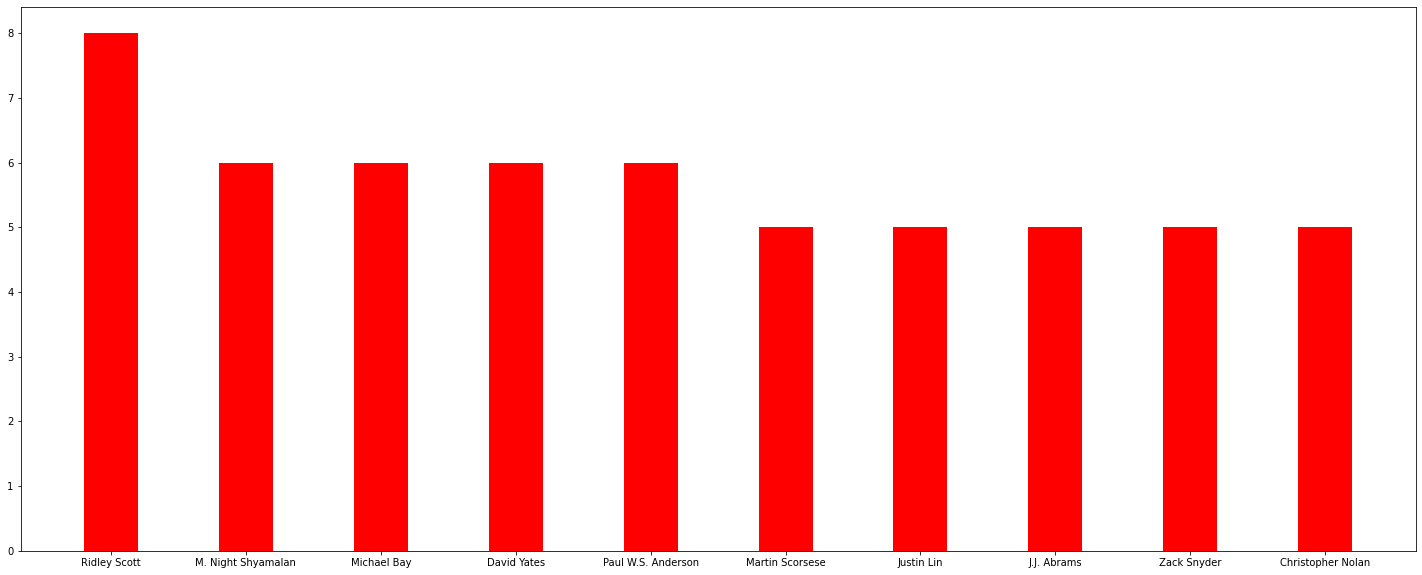

In [ ]:
# count the movies and visualize the top 10 actor's movies in plot

movie_count={}

Director=[]

for i in movie['Director']:
    
    if i not in movie_count:
        
        movie_count[i]=1
        
    else:

        movie_count[i]=movie_count[i]+1

from heapq import nlargest
top=nlargest(10, movie_count, key = movie_count.get)
key=[]

for i in top:
    
    key.append(movie_count[i])

    
    
    
    
fig = plt.figure(figsize = (25, 10))
#plt.bar(*zip(*movie_count.items()))

plt.bar(top,key ,0.4,color='red')
plt.show()




In [ ]:
# filter the movies with specific actor's name

Actor="Chris Pratt"

for j in Act:

        string=j.split(",")
        
        if Actor in string:
            
            print(movie[movie['Actors']==j])



     Rank           Title                       Genre  \
384   385  The Lego Movie  Animation,Action,Adventure   

                                           Description   Director  \
384  An ordinary Lego construction worker, thought ...  Phil Lord   

                                                Actors  Year  Runtime_Minutes  \
384  Chris Pratt, Will Ferrell, Elizabeth Banks, Wi...  2014              100   

     Rating   Votes  Revenue_(Millions)  Metascore  
384     7.8  266508              257.76       83.0  
   Rank                    Title                    Genre  \
0     1  Guardians of the Galaxy  Action,Adventure,Sci-Fi   

                                         Description    Director  \
0  A group of intergalactic criminals are forced ...  James Gunn   

                                              Actors  Year  Runtime_Minutes  \
0  Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...  2014              121   

   Rating   Votes  Revenue_(Millions)  Metascore  
0     8

[' Joel Edgerton', 'Matthew McConaughey', 'Mark Wahlberg', 'Adam Sandler', 'Tom Hardy', 'Jennifer Lawrence', 'Tom Cruise', 'Michael Fassbender', ' Viola Davis', ' Rachel McAdams']


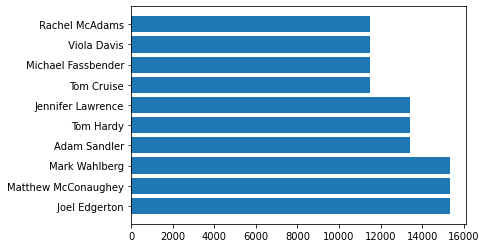

In [ ]:
# List of top 5 Actor per year who has highest rating from the year 2010 - 2017

data=movie[(movie['Year'] > 2010) & (movie['Year'] < 2017)]

Act=[]

for i in data['Actors']:
    
    st=i.split(",")
    
    for j in st:
        
        if j not in Act:
            
            Act.append(j)
C={}

for i in Act:
    
    for j in data['Actors']:
        
        st=j.split(",")
        
        for k in st:
            
            if k not in C:
                
                C[k]=1
            else:
                
                C[k]=C[k]+1


top=nlargest(10, C, key = C.get)
key=[]

for i in top:
    
    key.append(C[i])

print(top)
    
    
    
#fig = plt.figure(figsize = (25, 10))
#plt.bar(*zip(*movie_count.items()))

#plt.bar(top,key ,0.4,color='red')
#plt.show()

plt.barh(top, key)
plt.show()
# plot horizontal barcahrt of upper output


552


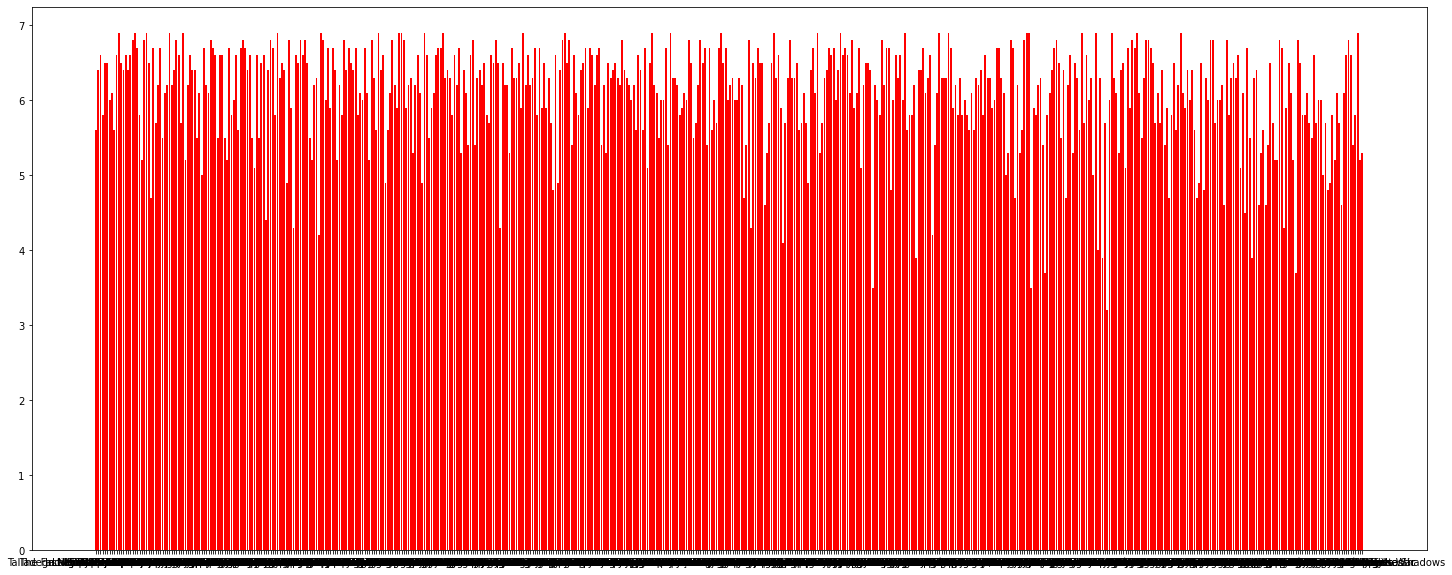

In [ ]:
# show count all movies which has rating more 3.0 and less than 7.0

R=movie['Rating']

c=0

for i in R:
    
    if i> 3.0 and i<7.0:
        
        c=c+1
print(c)

data=movie[(movie['Rating'] > 3.0) & (movie['Rating'] < 7.0)]


top=data['Title']
key=data['Rating']


fig = plt.figure(figsize = (25, 10))
#plt.bar(*zip(*movie_count.items()))

plt.bar(top,key,color='red')
plt.show()





# plot vertical barchart of upper output, movies w.r.t rating


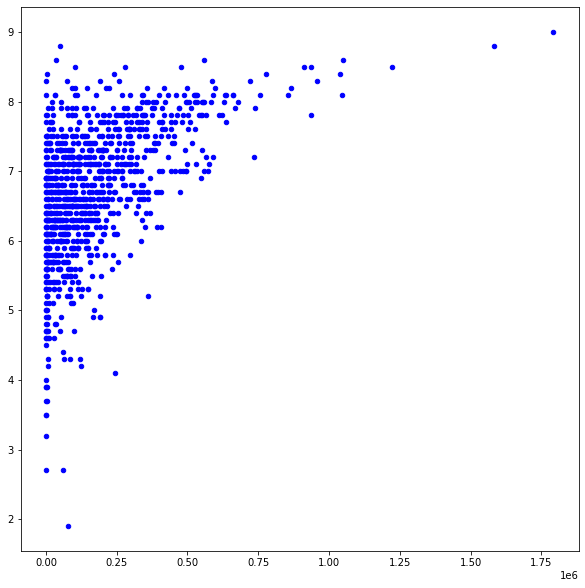

In [ ]:
#  plot scatter between voting and rating 

vote=movie['Votes']

r=movie['Rating']


ig = plt.figure(figsize = (10, 10))
plt.scatter(vote, r, c ="blue",s=20)
  
# To show the plot
plt.show()

     Rank                                       Title  \
50     51  Star Wars: Episode VII - The Force Awakens   
87     88                                      Avatar   
85     86                              Jurassic World   
76     77                                The Avengers   
54     55                             The Dark Knight   
12     13                                   Rogue One   
119   120                                Finding Dory   
94     95                     Avengers: Age of Ultron   
124   125                       The Dark Knight Rises   
578   579             The Hunger Games: Catching Fire   

                          Genre  \
50     Action,Adventure,Fantasy   
87     Action,Adventure,Fantasy   
85      Action,Adventure,Sci-Fi   
76                Action,Sci-Fi   
54           Action,Crime,Drama   
12      Action,Adventure,Sci-Fi   
119  Animation,Adventure,Comedy   
94      Action,Adventure,Sci-Fi   
124             Action,Thriller   
578    Action,Adventur

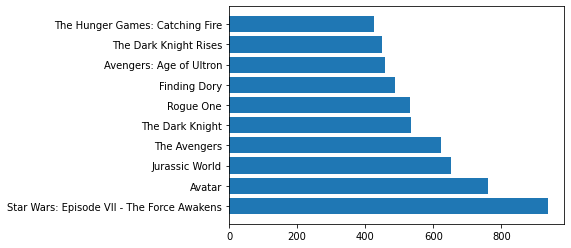

In [ ]:
# print top 10 movies which has higher revenue

#print(movie.groupby('Title')['Revenue_(Millions)'].nlargest(10))


print(movie.nlargest(10,'Revenue_(Millions)'))

# plot horizontal barchart of upper output

data=movie.nlargest(10,'Revenue_(Millions)')

top=data['Title']

key=data['Revenue_(Millions)']

plt.barh(top, key)
plt.show()


54           The Dark Knight
80                 Inception
124    The Dark Knight Rises
144         Django Unchained
76              The Avengers
36              Interstellar
Name: Title, dtype: object


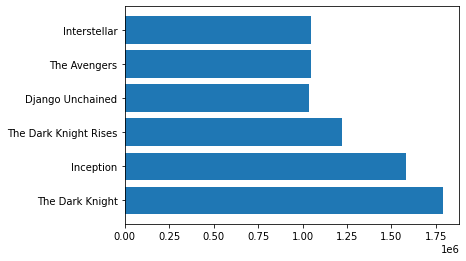

In [ ]:
# top 10 movies which has highest number of voting greater than 1000000

Top=movie[movie['Votes']>1000000]

print(Top['Title'])

# plot horizontal barchart of upper output 
top=Top['Title']
key=Top['Votes']

plt.barh(top, key)
plt.show()




Director
James Cameron      760.510
Colin Trevorrow    652.180
Joss Whedon        541.135
Lee Unkrich        414.980
Chris Buck         400.740
Chris Renaud       368.310
Gareth Edwards     366.415
Tim Miller         363.020
Byron Howard       341.260
J.J. Abrams        336.690
Name: Revenue_(Millions), dtype: float64


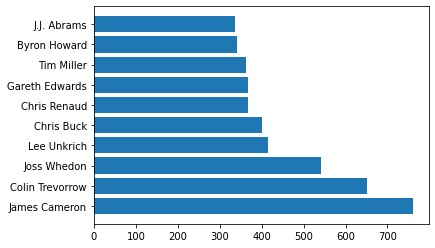

In [ ]:
# print top 10 directors, which has generated highest "average ravenue".

print(movie.groupby('Director')['Revenue_(Millions)'].mean().nlargest(10))

# plot horizontal bar chart of revenue w.r.t director 

d1=movie.groupby('Director')['Revenue_(Millions)'].mean().nlargest(10)

data=pd.DataFrame(d1,columns=['Revenue_(Millions)'])

top=d1.index

key=d1.values

plt.barh(top, key)
plt.show()





Genre
Action                         214.516376
Action,Adventure               671.220000
Action,Adventure,Biography      33.000000
Action,Adventure,Comedy       1340.270000
Action,Adventure,Crime         543.720000
                                 ...     
Romance,Sci-Fi,Thriller         62.450000
Sci-Fi                         103.716376
Sci-Fi,Thriller                 64.510000
Thriller                       663.971009
Thriller,War                    82.956376
Name: Revenue_(Millions), Length: 207, dtype: float64
Genre
Action                        107.258188
Action,Adventure              223.740000
Action,Adventure,Biography     16.500000
Action,Adventure,Comedy        95.733571
Action,Adventure,Crime         90.620000
                                 ...    
Romance,Sci-Fi,Thriller        62.450000
Sci-Fi                         51.858188
Sci-Fi,Thriller                64.510000
Thriller                       73.774557
Thriller,War                   82.956376
Name: Revenue_(Millio

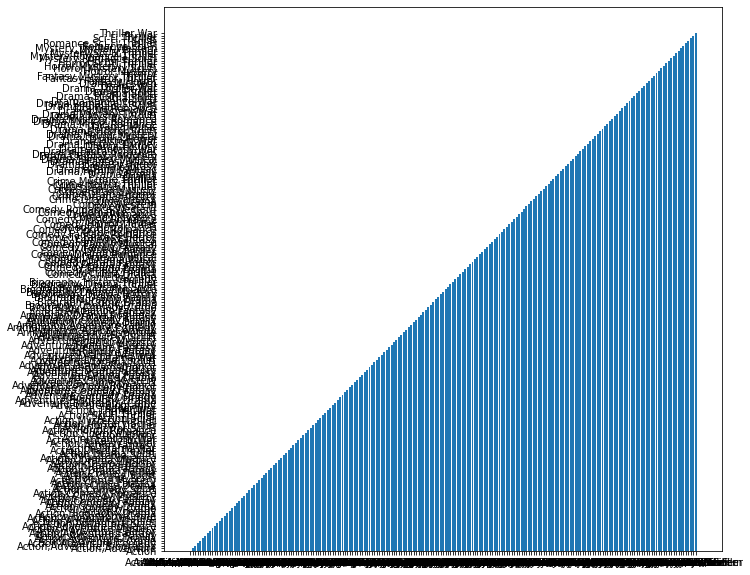

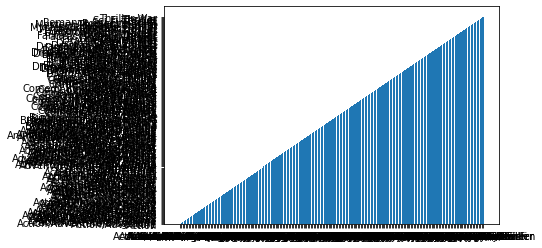

In [ ]:
# calculate total and average revenue of each gerne 

G=[]

for i in movie['Genre']:
    
    st=i.split(",")
    
    for j in st:
    
        if j not in G:
        
            G.append(j)

        
C1={}
C2={}

for i in G:
    
    for j in movie['Genre']:
        
        st=j.split(",")
        
        for k in st:
            
            if k not C1:
                
                
        
        



print(movie.groupby(['Genre'])['Revenue_(Millions)'].sum())
print(movie.groupby(['Genre'])['Revenue_(Millions)'].mean())

# prin hitogram of upper output, like showing below

d1=movie.groupby(['Genre'])['Revenue_(Millions)'].sum()
d2=movie.groupby(['Genre'])['Revenue_(Millions)'].mean()

ig = plt.figure(figsize = (10, 10))
top=d1.index
key=d1.index

plt.bar(top, key)
plt.show()

top=d2.index
key=d2.index

plt.bar(top, key)
plt.show()

![image.png](attachment:image.png)

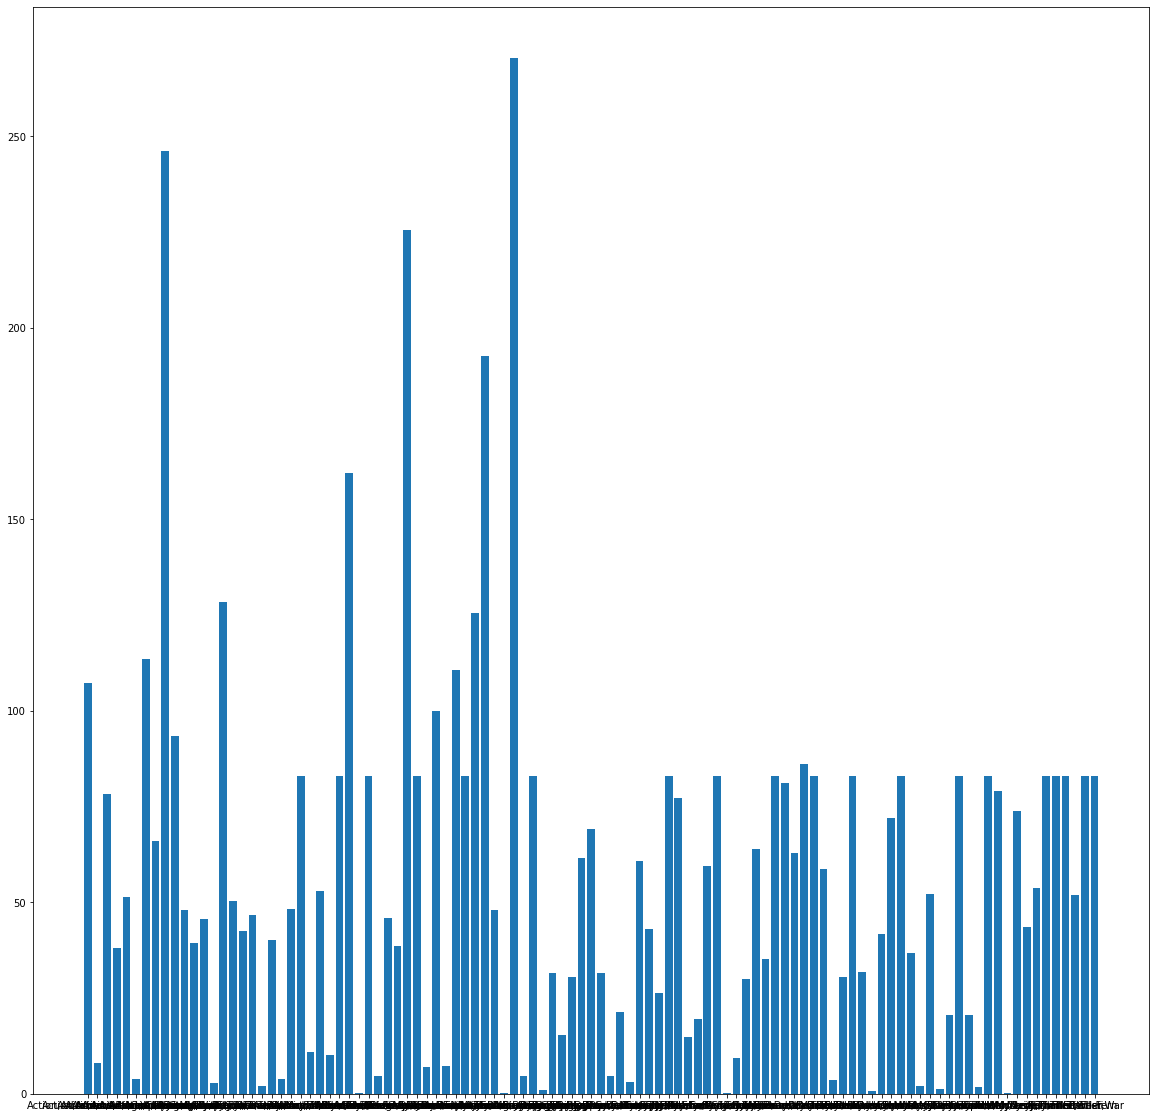

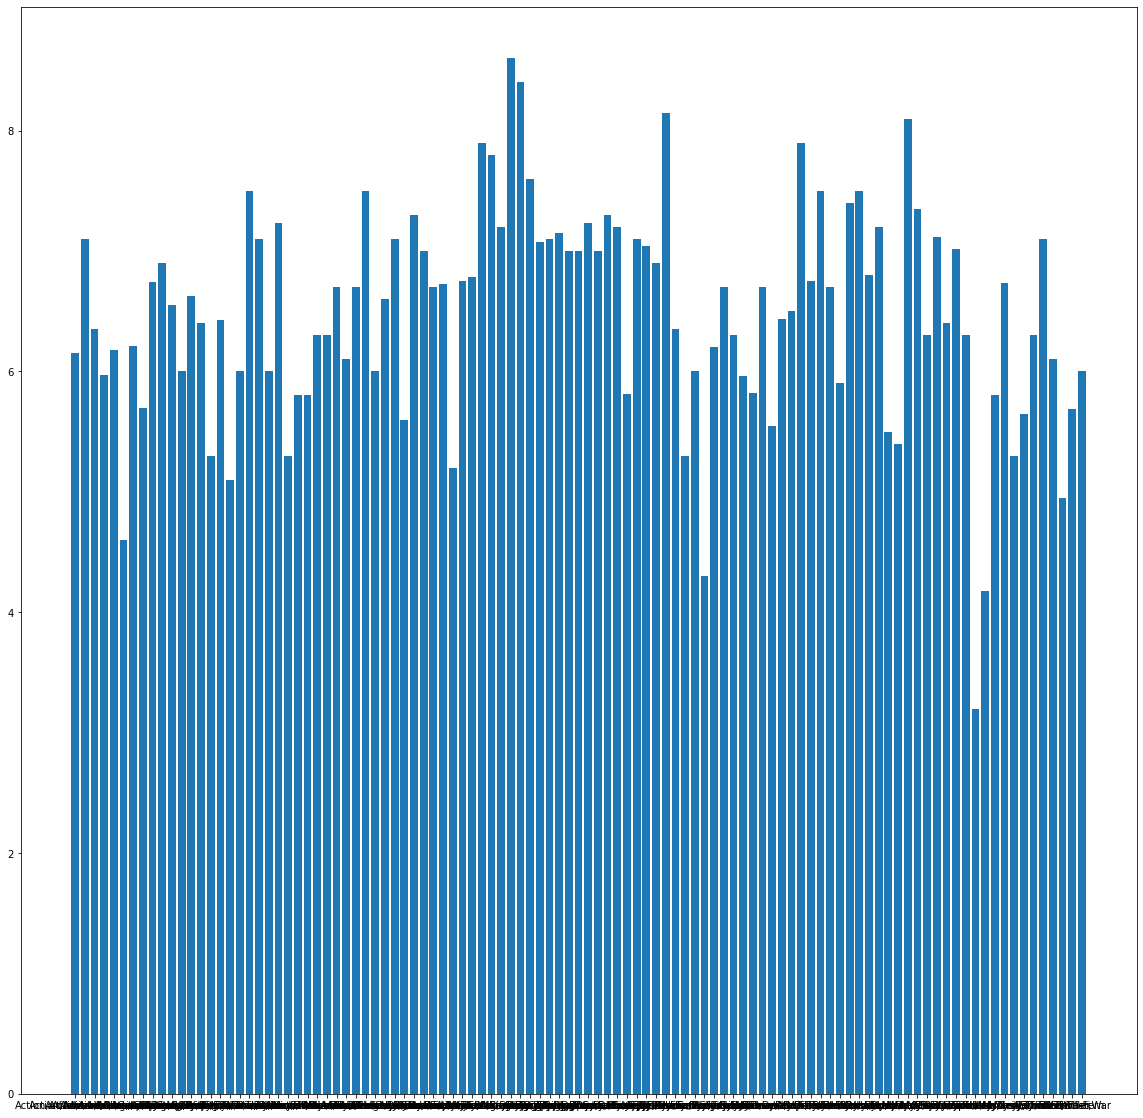

In [ ]:


d1=G.groupby(['Genre','Year'])['Revenue_(Millions)'].mean()

d2=G.groupby(['Genre','Year'])['Rating'].mean()

top=[]

for (i,j) in d1.index:
    
    top.append(i)


key=d1.values    

ig = plt.figure(figsize = (20, 20))


plt.bar(top, key)
plt.show()

top=[]

for (i,j) in d2.index:
    
    top.append(i)


key=d2.values    

ig = plt.figure(figsize = (20, 20))


plt.bar(top, key)
plt.show()


# plot barchart of gerne w.r.t to revenue and average


In [ ]:
# visualize metascore column with boxplot

# and explain what information you got from

In [ ]:
# Exploratory yearly analysis with dimensions on genres, revenue, rating
# like in 2010, each gerne movie generated average revenue and got this average rating

Y=[]

for i in movie['Year']:

      if i not in Y:
            
            Y.append(i)




for i in Y:

        G=movie[movie['Year']==i]

        print(G.groupby('Genre')['Revenue_(Millions)'].mean())

        print(G.groupby('Genre')['Rating'].mean())